
# Toma de desiciones de negocio con base en los datos.

### Se hán recopilado datos de una tienda online y con base en ellos se plantean las siguientes hipótesis:

1. Añade dos nuevos canales para atraer tráfico. Esto generará un 30% más de usuarios.
2. Crea tu propio servicio de reparto. Esto acortará el tiempo de entrega.
3. Añade bloques de recomendación de productos al sitio web de la tienda. Esto aumentará la conversión y el importe medio de compra.
4. Cambia la estructura de categorías. Esto aumentará la conversión, ya que los usuarios encontrarán más rápidamente los productos que buscan.
5. Cambia el color de fondo de la página principal. Esto aumentará la interacción del usuario.
6. Añade una página de reseñas de clientes. Esto aumentará el número de pedidos.
7. Muestra banners con las ofertas y promociones actuales en la página principal. Esto aumentará la conversión.
8. Agrega un formulario de suscripción a todas las páginas principales. Esto te ayudará a crear una lista de correo.
9. Lanzar una promoción que ofrezca descuentos a los usuarios en sus cumpleaños.

El objetivo es analizarlas para determinar su priorización y poder realizar pruebas A/B y con base en los resultados, recomendar las mejoras que puedan incrementar los ingresos en el negocio.

Iniciaremos aplicando el frameWork ICE para priorizar y ordenar las hipótesis.

In [30]:
#importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Carga de datos
hypotheses_us = pd.read_csv('C:/Users/ralf_/Documents/curso_data/sprint_10/hypotheses_us.csv', sep= ';')

hypotheses_us



,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [2]:
#Calcularemos el factor de facilidad
hypotheses_us['ease'] = 1 / hypotheses_us['Effort']

#Calculamos la puntuacion ICE
hypotheses_us['score_ice'] = (hypotheses_us['Impact'] * hypotheses_us['Confidence']) * hypotheses_us['ease']

#Ordenamos la priorización
hypotheses_us= hypotheses_us.sort_values(by='score_ice', ascending= False).reset_index(drop= True)

#Imprimimos el df con las priorizaciones
print('Ranking de Hipótesis según el frameWork de ICE')
print(hypotheses_us[['score_ice', 'Hypothesis', 'Impact', 'Confidence', 'Effort']])

Ranking de Hipótesis según el frameWork de ICE
   score_ice                                         Hypothesis  Impact  \
0  16.200000  Launch a promotion that gives users discounts ...       9   
1  13.333333  Add two new channels for attracting traffic. T...      10   
2  11.200000  Add a subscription form to all the main pages....       7   
3   8.000000  Show banners with current offers and sales on ...       3   
4   7.000000  Add product recommendation blocks to the store...       3   
5   2.000000  Launch your own delivery service. This will sh...       5   
6   1.333333  Add a customer review page. This will increase...       2   
7   1.125000  Change the category structure. This will incre...       3   
8   1.000000  Change the background color on the main page. ...       1   

   Confidence  Effort  
0           9       5  
1           8       6  
2           8       5  
3           8       3  
4           7       3  
5           4      10  
6           2       3  
7         

De acuerdo con los datos obtenidos en el FrameWork de ICE tenemos que la hipótesis de lazar promociones y descuentos para los cumpleañeros es la que tendrá más impacto con menos uso de recursos.

Ahora realizaremos el FrameWork RICE el cual toma en cuenta el criterio Reach (alcance).

In [3]:
#Calcularemos la puntuación según el frameWork RICE = (Reach * Impact * Confidence) / Effort
hypotheses_us['score_rice'] = (hypotheses_us['Reach'] * hypotheses_us['Impact'] * hypotheses_us['Confidence']) / hypotheses_us['Effort']

#Ordenadmos las hipótesis
hypotheses_us= hypotheses_us.sort_values(by= 'score_rice', ascending=False).reset_index(drop=True)

#Imprimimos el df con las priorizaciones
print('Ranking de Hipótesis según el frameWork de RICE')
print(hypotheses_us[['score_rice', 'Hypothesis', 'Reach','Impact', 'Confidence', 'Effort']])



Ranking de Hipótesis según el frameWork de RICE
   score_rice                                         Hypothesis  Reach  \
0       112.0  Add a subscription form to all the main pages....     10   
1        56.0  Add product recommendation blocks to the store...      8   
2        40.0  Add two new channels for attracting traffic. T...      3   
3        40.0  Show banners with current offers and sales on ...      5   
4        16.2  Launch a promotion that gives users discounts ...      1   
5         9.0  Change the category structure. This will incre...      8   
6         4.0  Launch your own delivery service. This will sh...      2   
7         4.0  Add a customer review page. This will increase...      3   
8         3.0  Change the background color on the main page. ...      3   

   Impact  Confidence  Effort  
0       7           8       5  
1       3           7       3  
2      10           8       6  
3       3           8       3  
4       9           9       5  
5       3

Ahora con el FrameWork RICE tenemos que la hipótesis de agregar un formulario de suscripción en las páginas principales, ayudrá al negocio.

Como podemos notar el cambio es notorio utilizando las distintas framework, por su parte Ice nos idica la hipótesis que sería más ágil de implementar con buenos resultados; En cuanto a Rice al tomar en cuenta el criterio de de alcance, prioriza la hipótesis que ayuda a registrar a más audiencia. 

# Pruebas A/B

### Para la segunda parte del análisis realizaremos un test A/B con los datos proporcionado de la página online para así poder realizar las recomdaciones pertinentes.

Comenzaremos por cargar los datos y hacer una validación y análisis exploratio para asegurar la calidad de los resultados. 

In [4]:
#cargamos datos
 
orders_us = pd.read_csv('C:/Users/ralf_/Documents/curso_data/sprint_10/orders_us.csv')
visits_us = pd.read_csv('C:/Users/ralf_/Documents/curso_data/sprint_10/visits_us.csv')

print(orders_us.info())

print(visits_us.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [5]:
#modificaremos el tipo de dato de fecha ya que para las pruebas es importante ealizar operaciones cin ella.

orders_us['date'] = pd.to_datetime(orders_us['date'])
visits_us['date'] = pd.to_datetime(visits_us['date'])

print(orders_us.info())
print(visits_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


C:\Users\ralf_\AppData\Local\Temp\ipykernel_14784\3833210522.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  orders_us['date'] = pd.to_datetime(orders_us['date'])


In [9]:
#Identificaremos los usuarios únicos en cada grupo
usuarios_a = set(orders_us[orders_us['group']== 'A']['visitorId'])
usuarios_b = set(orders_us[orders_us['group']== 'B']['visitorId'])

#validaremos los usuarios repetidos en ambos grupos
usuarios_repetidos = usuarios_a.intersection(usuarios_b)
cantidad_repetidos = len(usuarios_repetidos)

print(f'Usuarios únicos en grupo A: {len(usuarios_a)}')
print(f'Usuarios únicos en grupo B: {len(usuarios_b)}')
print(f'Usuarios presentes en ambos grupos: {cantidad_repetidos}')

if cantidad_repetidos > 0:
    print('IDs contaminados:')
    print(list(usuarios_repetidos))

Usuarios únicos en grupo A: 503
Usuarios únicos en grupo B: 586
Usuarios presentes en ambos grupos: 58
IDs contaminados:
[3957174400, 3984495233, 2780786433, 1294878855, 1648269707, 1614305549, 4120364173, 232979603, 199603092, 4266935830, 2712142231, 2587333274, 2716752286, 3891541246, 1668030113, 2654030115, 3234906277, 1230306981, 1404934699, 3803269165, 2949041841, 237748145, 457167155, 2927087541, 1738359350, 3062433592, 3656415546, 818047933, 393266494, 963407295, 471551937, 2579882178, 3202540741, 2686716486, 1333886533, 2044997962, 3941795274, 1801183820, 2378935119, 4256040402, 4069496402, 3766097110, 8300375, 351125977, 1602967004, 276558944, 2038680547, 3951559397, 3963646447, 4186807279, 3717692402, 1959144690, 2458001652, 2600415354, 2954449915, 1316129916, 477780734, 3972127743]


Detectamos que existen usuarios que entraron en el grupo A y también en el grupo B, lo cual impacta negativamente en los resultados de las pruebas A/B que haremos posteriormente, eliminaremos todos los registros ya que no podemos saber cual fue su comportamiento inicial y tampoco representa una gran cantidad de registros, así que mejor excluiremos esa información. 

In [16]:
#para excluir los datos repetidos crearemos un nuevo df con los datos únicos
if cantidad_repetidos > 0:
    orders = orders_us[~orders_us['visitorId'].isin(usuarios_repetidos)]

    print(f'Se han eliminado {cantidad_repetidos} usuarios del análisis')
else:
    orders= orders_us.copy()
    print('\n¡Los datos están limpios')

print(orders)

Se han eliminado 58 usuarios del análisis
      transactionId   visitorId       date  revenue group
0        3667963787  3312258926 2019-08-15     30.4     B
1        2804400009  3642806036 2019-08-15     15.2     B
3        3797467345  1196621759 2019-08-15    155.1     B
4        2282983706  2322279887 2019-08-15     40.5     B
5         182168103   935554773 2019-08-15     35.0     B
...             ...         ...        ...      ...   ...
1191     3592955527   608641596 2019-08-14    255.7     B
1192     2662137336  3733762160 2019-08-14    100.8     B
1193     2203539145   370388673 2019-08-14     50.1     A
1194     1807773912   573423106 2019-08-14    165.3     A
1196     3936777065  2108080724 2019-08-15   3120.1     B

[1016 rows x 5 columns]


Ya con los datos limpios procedemos a realizar los análisis solicitados.

### 1. Ingresos acumulados por grupo:

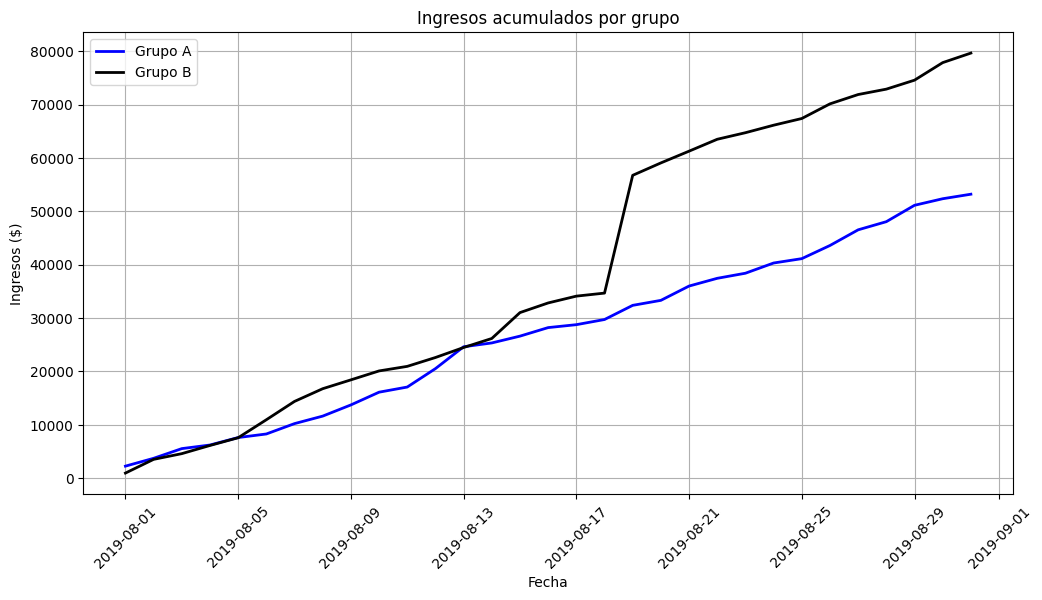

In [19]:

#Agrupamos los ingresos por fecha y grupo 
revenue_a_b = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()

#Creamos una tabla dinámica
pivot_revenue = revenue_a_b.pivot(index='date',columns='group',values='revenue').fillna(0)

#Calculamos la suma acumulada 
revenue_sum= pivot_revenue.cumsum()

#realizamos el gráfico
plt.figure(figsize=(12,6))
#grupo A
plt.plot(revenue_sum.index, revenue_sum['A'], label= 'Grupo A', color= 'blue', linewidth=2)
#grupo B
plt.plot(revenue_sum.index, revenue_sum['B'], label= 'Grupo B', color= 'black', linewidth=2)

plt.title('Ingresos acumulados por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos ($)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


De acuerdo al gráfico vemos que en un principio los grupos tienen ingresos parecidos, pero tenemos un salto en el grupo B que aparenta un incremento importante, pero pienso que puede deberse a un outlier por la compra de un solo usuario, lo cual puede se engañoso en los resultados.

Filtraremos el Df omitiendo los Outlier para tener mayor calidad en los resultados porteriores.

In [38]:
#calculamos el umbral del outlier
outlier = orders['revenue'].quantile(0.99)

#creamos el df definitivo

orders_def = orders[orders['revenue']< outlier].copy()

print(f"Umbral de Ingresos (Percentil 99): ${outlier:.2f}")
print(f"Transacciones eliminadas: {len(orders) - len(orders_def)}")
print(f"Transacciones restantes en df_final: {len(orders_def)}")

Umbral de Ingresos (Percentil 99): $830.30
Transacciones eliminadas: 12
Transacciones restantes en df_final: 1004


### 2. Tamaño de pedido promedio acumulado por grupo.

Promedio de pedidos por usuario:
  group     order
0     A  1.052511
1     B  1.038241


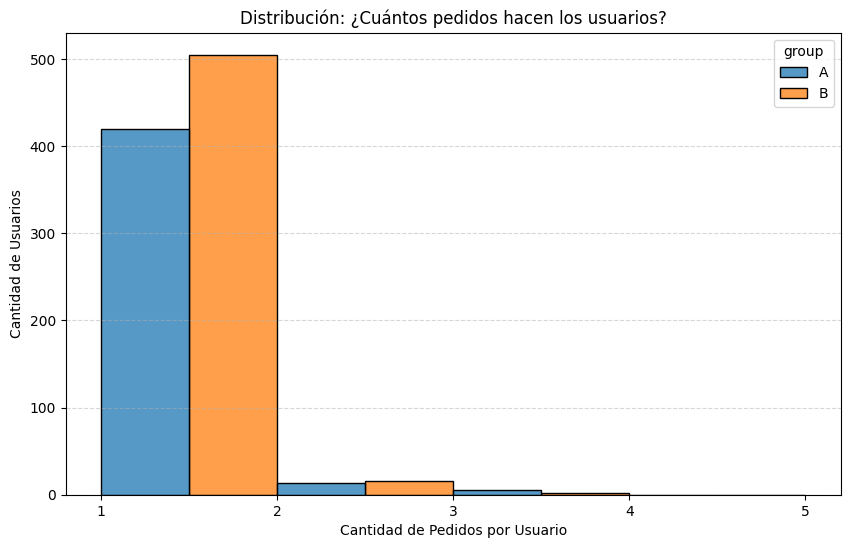

In [39]:
#Agrupamos por usuario para contar cuantos pedidos promedio hicieron
orders_by_user = orders_def.groupby(['group','visitorId'])['transactionId'].count().reset_index()
orders_by_user = orders_by_user.rename(columns={'transactionId': 'order'})

#calculamos el promedio por grupo
avg_orders = orders_by_user.groupby('group')['order'].mean().reset_index()

print('Promedio de pedidos por usuario:')
print(avg_orders)

#creamos un histograma para visualizar los pedidos promedio
plt.figure(figsize=(10, 6))
sns.histplot(data=orders_by_user, x='order', hue='group', multiple='dodge', bins=range(1, 6))
plt.title('Distribución: ¿Cuántos pedidos hacen los usuarios?')
plt.xlabel('Cantidad de Pedidos por Usuario')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Notamos que los usuarios tienden a solo realizar un pedido y aunque en el grupo B se ralizaron más pedidos no se nota una permanecia del usuario.

# 3. Diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

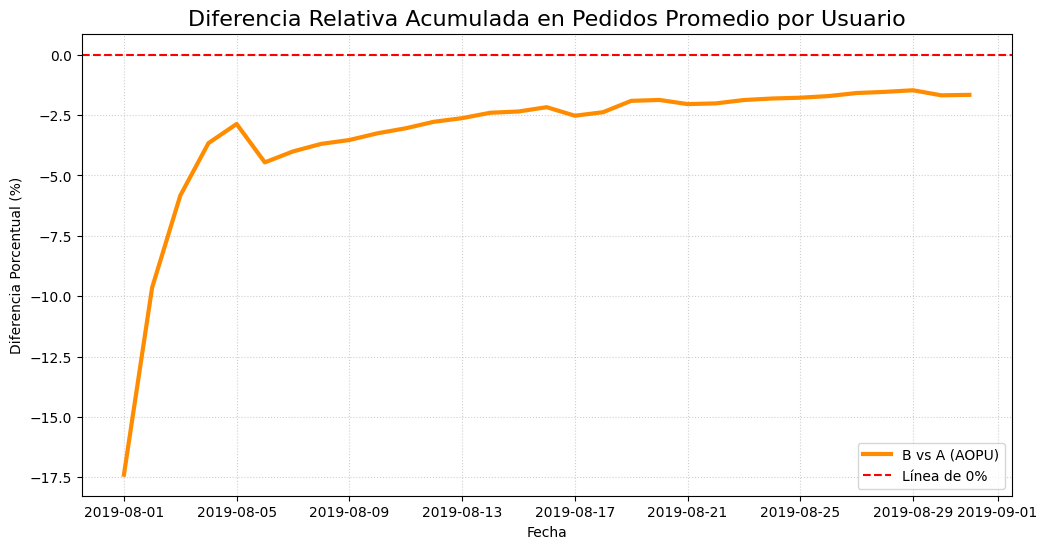

In [42]:
#Agrupamos un contamos ordenes y usuarios únicos
order_avg = orders_def.groupby(['date','group']).agg(total_orders=('transactionId', 'count'), total_users=('visitorId','nunique')).reset_index()

#Creamos tablas dinámicas
orders_pivot = order_avg.pivot(index='date', columns='group', values='total_orders').fillna(0)
users_pivot = order_avg.pivot(index='date', columns='group', values='total_users').fillna(0)

#Sumas Acumuladas
cumulative_orders = orders_pivot.cumsum()
cumulative_users = users_pivot.cumsum()

#Cálculo del AOPU Acumulado (Orders / Users)
cumulative_aopu = cumulative_orders / cumulative_users

#Calculamos la diferencia relativa
relative_diff_aopu = (cumulative_aopu['B'] - cumulative_aopu['A']) / cumulative_aopu['A'] * 100

#Graficamos
plt.figure(figsize=(12, 6))
plt.plot(relative_diff_aopu.index, relative_diff_aopu, 
         label='B vs A (AOPU)', color='darkorange', linewidth=3)


plt.axhline(y=0, color='red', linestyle='--', label='Línea de 0%')


plt.title('Diferencia Relativa Acumulada en Pedidos Promedio por Usuario', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Diferencia Porcentual (%)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()



De acuerdo con los datos obtenidos podemos notar que:
* El grupo B es peor que el grupo A.
* El valor inicial de -17.39% significa que, en los primeros días, los usuarios del Grupo B hicieron casi un 18% menos pedidos que el Grupo A.
* La línea va mejorando gradualmente a lo largo del mes, va de un -17% a un -1%.


# 4. tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día.

In [43]:
#obtenemos el conteo de pedidos únicos por día y grupo
daily_orders = orders_def.groupby(['date', 'group'])['transactionId'].nunique().reset_index()
daily_orders.columns = ['date', 'group', 'orders']

# 2. Convertir la columna 'date' de visits si no lo está (para el merge)
# Si tu DataFrame de visitas se llama 'visits', ejecuta:
#visits_us['date'] = pd.to_datetime(visits['date'])

#Unimos df
data_cr = pd.merge(daily_orders, visits_us, on=['date', 'group'], how='left')

# Calculamos la Tasa de Conversión (%)
data_cr['conversion_rate'] = (data_cr['orders'] / data_cr['visits']) * 100

#Creamos tablas dinámicas
cr_pivot = data_cr.pivot(index='date', columns='group', values='conversion_rate')


print("--- Tasa de Conversión Diaria (Muestra) ---")
print(cr_pivot.head())

--- Tasa de Conversión Diaria (Muestra) ---
group              A         B
date                          
2019-08-01  3.198887  2.384292
2019-08-02  3.069467  3.958692
2019-08-03  4.733728  2.750491
2019-08-04  1.534170  1.818182
2019-08-05  2.910053  2.970297


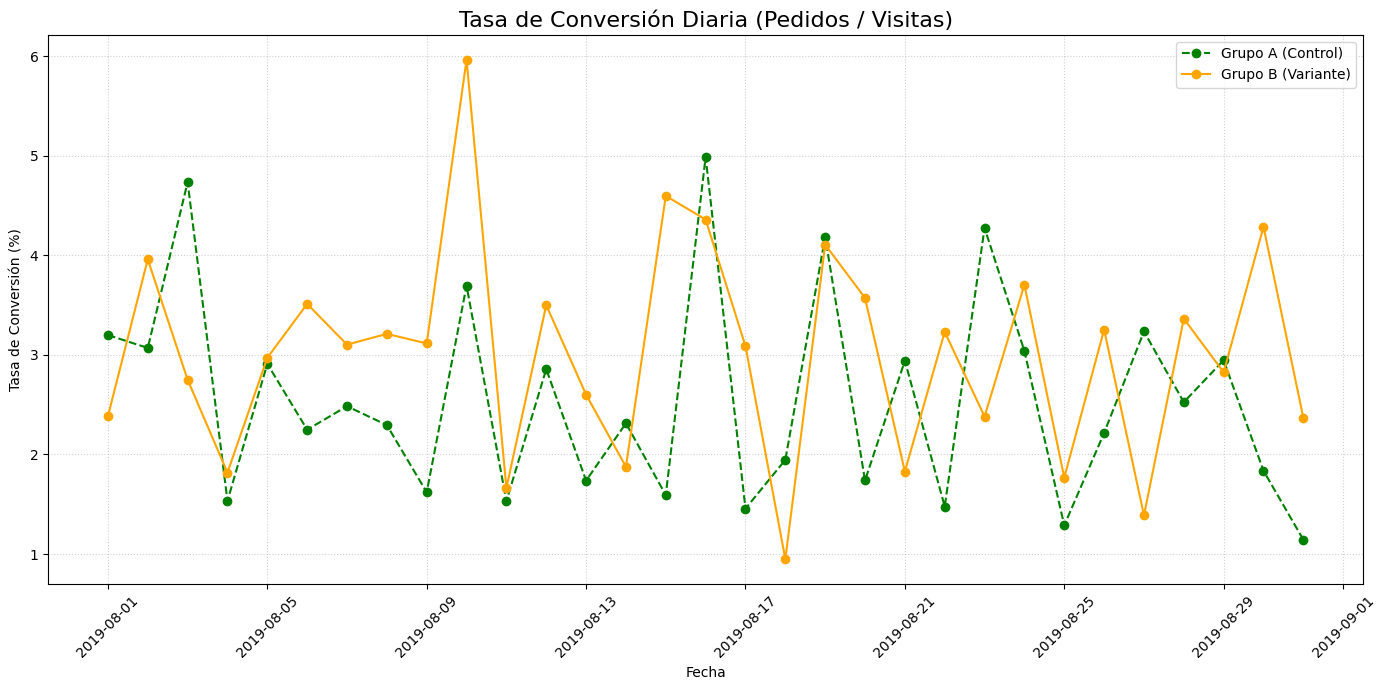

In [44]:
plt.figure(figsize=(14, 7))

#Grupo A
plt.plot(cr_pivot.index, cr_pivot['A'], label='Grupo A (Control)', color='green', marker='o', linestyle='--')

#Grupo B
plt.plot(cr_pivot.index, cr_pivot['B'], label='Grupo B (Variante)', color='orange', marker='o')


plt.title('Tasa de Conversión Diaria (Pedidos / Visitas)', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión (%)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se puede observar es que el grupo B no es consistente con el grupo A por lo que se puede deducir que el grupo B no está convirtiendo a más usuarios en clientes como el grupo A.

# 5. Gráfico de dispersión del número de pedidos por usuario.

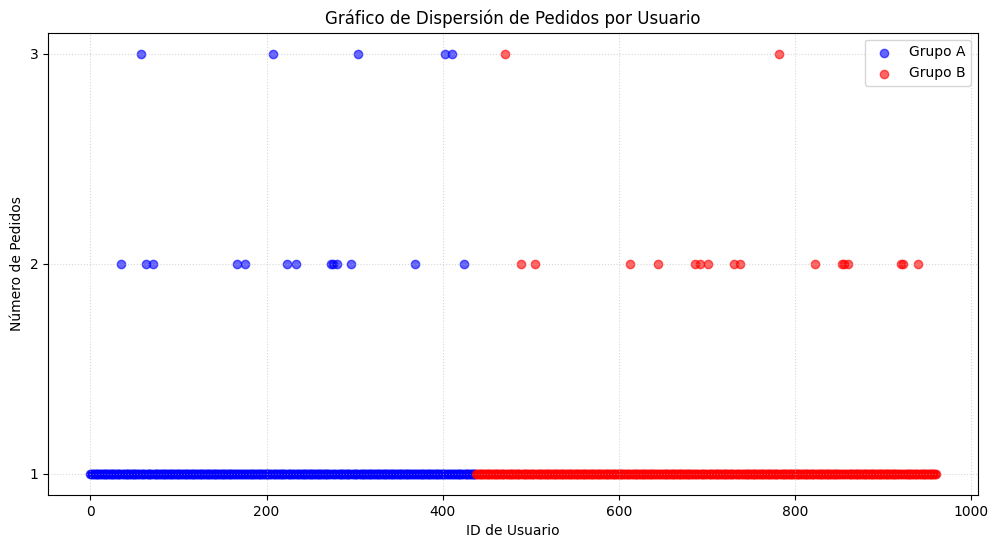

In [50]:
# Asignamos el índice del dataframe como un eje X arbitrario
orders_by_user['user_index'] = orders_by_user.index

plt.figure(figsize=(12, 6))
#Grupo A
plt.scatter(orders_by_user[orders_by_user['group'] == 'A']['user_index'], 
            orders_by_user[orders_by_user['group'] == 'A']['order'], 
            color='blue', alpha=0.6, label='Grupo A')
#Grupo B
plt.scatter(orders_by_user[orders_by_user['group'] == 'B']['user_index'], 
            orders_by_user[orders_by_user['group'] == 'B']['order'], 
            color='red', alpha=0.6, label='Grupo B')

plt.title('Gráfico de Dispersión de Pedidos por Usuario')
plt.xlabel('ID de Usuario')
plt.ylabel('Número de Pedidos')
plt.yticks(range(1, int(orders_by_user['order'].max()) + 1))
plt.legend()
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

Este gráfico visualiza cada punto de dato pero no revela la distribución, muestra el valor de ordenes para cada usuario.

# 6. Cálculo de percentiles 95 y 99 del número de pedidos por usuario. Se define el punto en el cual un punto de datos se convierte en una anomalía.

In [52]:
#percentil 95
percentil_95 = orders_by_user['order'].quantile(0.95)

#99
percentil_99 = orders_by_user['order'].quantile(0.99)

print("--- Percentiles de Pedidos por Usuario ---")
print(f"Percentil 95 (Q95): {percentil_95:.0f} pedidos")
print(f"Percentil 99 (Q99): {percentil_99:.0f} pedidos")

--- Percentiles de Pedidos por Usuario ---
Percentil 95 (Q95): 1 pedidos
Percentil 99 (Q99): 2 pedidos


Los datos nos indican que:
* Percentil 95 (1 pedido): El 95% de los usuarios compraron una sola vez.

* Percentil 99 (2 pedidos): El 99% de los usuarios hicieron dos pedidos o menos.

Esto confirma que el 99% de los clientes no es recurrente. Los usuarios con 3 o más pedidos son extremadamente raros por lo que se considera que ese es el punto de anomalía.

# 7. Gráfico de dispersión de los precios de los pedidos.

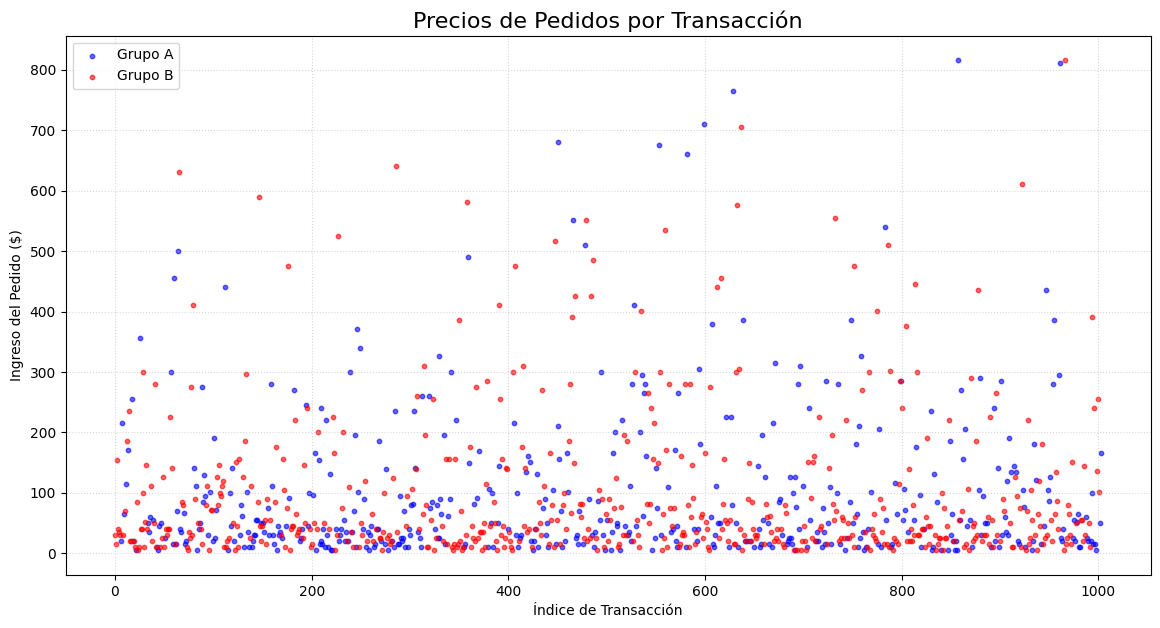

In [53]:
#Definimos un índice para el eje X
orders_def['transaction_index'] = range(len(orders_def))

plt.figure(figsize=(14, 7))

# Plot Grupo A
plt.scatter(orders_def[orders_def['group'] == 'A']['transaction_index'],
            orders_def[orders_def['group'] == 'A']['revenue'],
            color='blue', alpha=0.6, s=10, label='Grupo A') # s=10 define el tamaño del punto

# Plot Grupo B
plt.scatter(orders_def[orders_def['group'] == 'B']['transaction_index'],
            orders_def[orders_def['group'] == 'B']['revenue'],
            color='red', alpha=0.6, s=10, label='Grupo B')

plt.title('Precios de Pedidos por Transacción', fontsize=16)
plt.xlabel('Índice de Transacción')
plt.ylabel('Ingreso del Pedido ($)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

Vemos que la mayória de los puntos en ambos grupos se mantiene en la parte baja del gráfico lo cual nos indica que las compras son pequeñas en su mayoría, también vemos que el grupo A tiene compras marginalmente más caras en el rango del 95% al 99%.

# 8. Percentiles 95 y 99 de los precios de los pedidos.

In [54]:
#percentil 95
percentil_95_rev = orders_def['revenue'].quantile(0.95)

#percentil 99
percentil_99_rev = orders_def['revenue'].quantile(0.99)

print("Percentiles de Precios de Pedidos:")
print(f"Percentil 95 (Q95): ${percentil_95_rev:.2f}")
print(f"Percentil 99 (Q99): ${percentil_99_rev:.2f}")

Percentiles de Precios de Pedidos:
Percentil 95 (Q95): $379.42
Percentil 99 (Q99): $630.20


Los resultandos indican que:
* Percentil 95 ($379.42): El 95% de todos los pedidos en la tienda cuestan $379.42 o menos.

* Percentil 99 ($630.20): El 99% de todos los pedidos cuestan $630.20 o menos.

Esto significa que cualquier pedido que exceda los $630.20 es una transacción anómala.

# 9. Significancia estadística de la diferencia en la conversión entre los grupos.

In [56]:
from scipy.stats import chi2_contingency

#Agrupamos los datos de ordenes y visitas
orders_count = orders_def.groupby('group')['transactionId'].nunique()
visits_count = visits_us.groupby('group')['visits'].sum()

#tabla de convertidos
converted_a = orders_count.get('A', 0)
converted_b = orders_count.get('B', 0)
visits_a = visits_count.get('A', 0)
visits_b = visits_count.get('B', 0)

#Calculamos lo No convertidos
non_converted_a = visits_a - converted_a
non_converted_b = visits_b - converted_b

#Construir la matriz 2x2
contingency_table = np.array([
    [converted_a, converted_b],
    [non_converted_a, non_converted_b]
])

print("Tabla de Contingencia (Pedidos vs No Pedidos)")
print(contingency_table)

# Verificación de Tasas de Conversión (para contexto)
cr_a = (converted_a / visits_a) * 100
cr_b = (converted_b / visits_b) * 100
print(f"\nCR Grupo A: {cr_a:.4f}%")
print(f"CR Grupo B: {cr_b:.4f}%")

#Realizamos la prueba de hipótesis
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05
print("\n Tasa de Conversión")
print(f"Estadístico Chi2: {chi2:.4f}")
print(f"P-Value: {p_value:.5f}")


if p_value < alpha:
    print("✅ Diferencia Significativa: Rechazamos la hipótesis nula.")
    print("Conclusión: La diferencia en la Tasa de Conversión entre A y B es estadísticamente real.")
else:
    print("❌ No hay diferencia significativa: No podemos rechazar la hipótesis nula.")
    print("Conclusión: La diferencia en la Tasa de Conversión observada es probablemente producto del azar.")

Tabla de Contingencia (Pedidos vs No Pedidos)
[[  461   543]
 [18275 18373]]

CR Grupo A: 2.4605%
CR Grupo B: 2.8706%

 Tasa de Conversión
Estadístico Chi2: 5.9419
P-Value: 0.01478
✅ Diferencia Significativa: Rechazamos la hipótesis nula.
Conclusión: La diferencia en la Tasa de Conversión entre A y B es estadísticamente real.


Notamos que los cambios que se han realzado en la prueba B han tenido un impacto real en la tasa de conversión.

# 10. Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos.

In [57]:
from scipy import stats

#Identificamos los precios de ambos grupos
revenue_A = orders_def[orders_def['group'] == 'A']['revenue']
revenue_B = orders_def[orders_def['group'] == 'B']['revenue']

#Comparamos las distribuciones de los precios de los pedidos entre los grupos.
u_stat, p_value = stats.mannwhitneyu(revenue_A, revenue_B, alternative='two-sided')

alpha = 0.05
print("\nResultados Test Mann-Whitney U (Precios de Pedido) ")
print(f"P-Value: {p_value:.5f}")

#Calculamos las medianas
median_A = revenue_A.median()
median_B = revenue_B.median()
print(f"Mediana AOV Grupo A: ${median_A:.2f}")
print(f"Mediana AOV Grupo B: ${median_B:.2f}")


Resultados Test Mann-Whitney U (Precios de Pedido) 
P-Value: 0.98841
Mediana AOV Grupo A: $50.10
Mediana AOV Grupo B: $45.70


El resultado de tu Prueba U de Mann-Whitney nos indica que:
*  $\mathbf{P\text{-Value} = 0.98841}$.
* Ya que $0.98841$ es mucho mayor que el nivel de significancia estándar ($\alpha = 0.05$), no podemos rechazar la hipótesis nula ($\mathbf{H_0}$).
* La diferencia observada en las medianas de los precios de pedidos ($50.10 vs. $45.70) no es estadísticamente significativa.



Concluimos que el diseño de la Variante B no tuvo un impacto real en la cantidad de dinero que los clientes gastan por pedido. La diferencia de $4.40  es tan pequeña que probablemente fue producto del azar o de fluctuaciones naturales del mercado.

## De acuerdo con los análisis realizados podemos tomar la decisión de Parar la prueba ya que no hay una diferencia significativa entre ambos grupos.

### La Variante B no logró el objetivo de mejorar el rendimiento del negocio. Los pequeños cambios observados son ruido estadístico. Lo más eficiente es detener la prueba y evitar la implementación de un cambio que no ofrece ningún beneficio.